# Simulation 

## 0 Packages

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from myimagelib import bestcolor, readdata
from scipy.signal import medfilt
from skimage import io
from scipy.ndimage import gaussian_filter1d
from scipy.signal import butter, filtfilt, argrelextrema, argrelmax, find_peaks
from IPython.display import clear_output
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from scipy.special import erf
from functools import partial
import matplotlib
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
plt.rcParams['xtick.major.size'] = 2  # Length of major ticks
plt.rcParams['ytick.major.size'] = 2  # Length of major ticks
plt.rcParams['xtick.minor.size'] = 1  # Length of minor ticks
plt.rcParams['ytick.minor.size'] = 1  # Length of minor ticks
import json
from IPython.display import clear_output
from scipy import integrate

## 1 An example surface evolution

Text(0, 0.5, 'Surface height, $h$ (mm)')

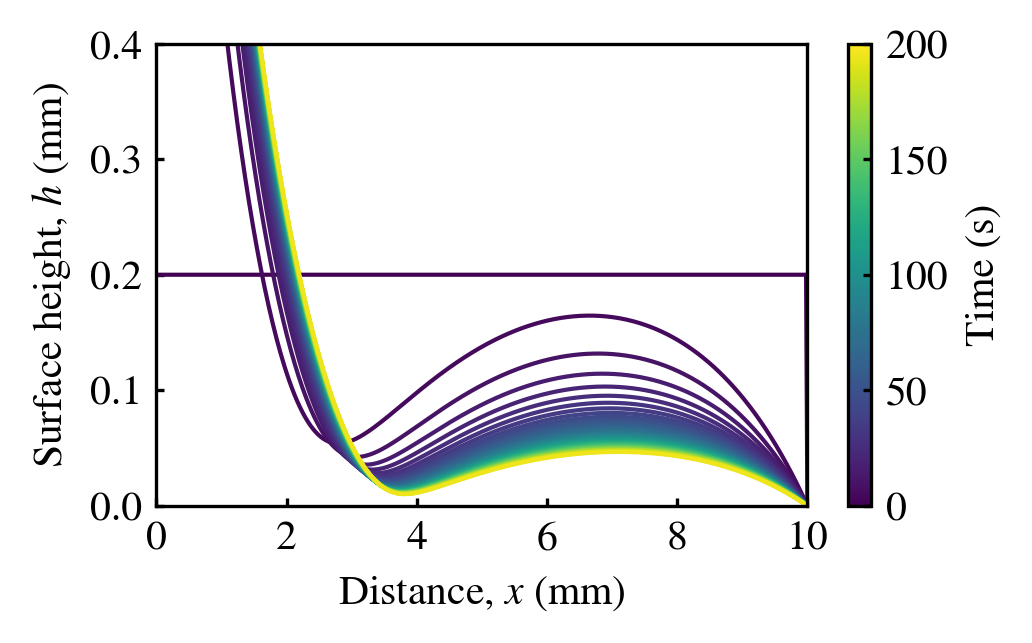

In [20]:
fileDir = r"C:\Users\zl948\Documents\WPM_simulation\Phase_diagram\mu_1.00e-02_sigma_4.20e-02_h0_2.00e-04_L_1.00e-02.h5"
df = pd.read_hdf(fileDir)
count = 0
fig, ax = plt.subplots(figsize=(3.5, 2), dpi=300)
cmap = plt.get_cmap("viridis")
tmax = float(df.columns[-1])

for kw in df.columns[::50]:
    ax.plot(df.index, df[kw], color=cmap(float(kw)/tmax), lw=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, .4])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
plt.colorbar(sm, ax=ax, label="Time (s)")
ax.set_xlabel("Distance, $x$ (mm)")
ax.set_ylabel("Surface height, $h$ (mm)")
# plt.tight_layout()
# plt.savefig("zoom_in.svg")

In [15]:
df

,0.000000,0.100050,0.200100,0.300150,0.400200,0.500250,0.600300,0.700350,0.800400,0.900450,...,141.270635,141.370685,141.470735,141.570785,141.670835,141.770885,141.870935,141.970985,142.071036,142.171086
x,,,,,,,,,,,,,,,,,,,,,
0.00000,0.2,0.420104,0.549850,0.640169,0.708737,0.763834,0.810679,0.852162,0.889774,0.923142,...,1.922152,1.922494,1.922838,1.923185,1.923533,1.923884,1.924237,1.924592,1.924950,1.925317
0.02004,0.2,0.412871,0.539030,0.626642,0.693008,0.746364,0.791954,0.832461,0.869094,0.901228,...,1.862191,1.862550,1.862911,1.863274,1.863639,1.864005,1.864374,1.864744,1.865116,1.865673
0.04008,0.2,0.405765,0.528409,0.613387,0.677628,0.729311,0.773696,0.813268,0.848967,0.879937,...,1.808499,1.808869,1.809240,1.809613,1.809988,1.810364,1.810742,1.811122,1.811503,1.812192
0.06012,0.2,0.398786,0.517983,0.600397,0.662586,0.712657,0.755884,0.794559,0.829367,0.859235,...,1.759501,1.759878,1.760257,1.760637,1.761018,1.761401,1.761785,1.762171,1.762557,1.763345
0.08016,0.2,0.391931,0.507749,0.587664,0.647871,0.696388,0.738501,0.776315,0.810269,0.839092,...,1.714198,1.714581,1.714964,1.715349,1.715735,1.716122,1.716510,1.716900,1.717290,1.718152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.91984,0.2,0.018525,0.015919,0.014838,0.014213,0.013850,0.013594,0.013256,0.012808,0.012822,...,0.002483,0.002492,0.002501,0.002511,0.002521,0.002531,0.002542,0.002553,0.002565,0.002578
9.93988,0.2,0.014013,0.012026,0.011202,0.010725,0.010449,0.010256,0.010004,0.009659,0.009669,...,0.001832,0.001838,0.001844,0.001851,0.001858,0.001865,0.001872,0.001880,0.001888,0.001897
9.95992,0.2,0.009425,0.008077,0.007518,0.007195,0.007008,0.006878,0.006711,0.006475,0.006481,...,0.001200,0.001204,0.001207,0.001211,0.001215,0.001219,0.001224,0.001228,0.001233,0.001238


## 2 Mesh size validation

C:\Users\zl948\AppData\Local\Temp\ipykernel_29484\2989807358.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


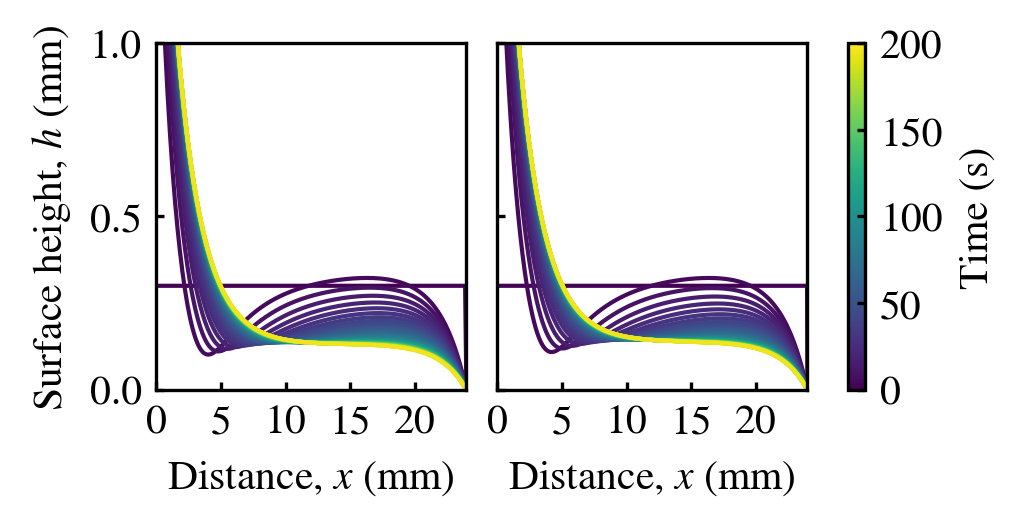

In [ ]:
folder = r"G:\My Drive\Research projects\WPM\Data\Simulation\meshsize"
thick = pd.read_csv(os.path.join(folder, "250.csv")).set_index("x")
thin = pd.read_csv(os.path.join(folder, "1000.csv")).set_index("x")
fig, ax = plt.subplots(ncols=2, figsize=(3.5,1.5), dpi=300, sharex=True, sharey=True, gridspec_kw={"wspace":0.1})
cmap = plt.get_cmap("viridis")
tmax = float(thin.columns[-1])
for kw in thick.columns[::50]:
    h = thick[kw].values
    x = thick.index.values
    ax[0].plot(thick.index, thick[kw], color=cmap(float(kw)/tmax), lw=1)
    ax[0].set_xlim([0, 24])
    ax[0].set_ylim([0, 1])
    ax[0].set_xlabel("Distance, $x$ (mm)")
    ax[0].set_ylabel("Surface height, $h$ (mm)")
for kw in thin.columns[::50]:
    h = thin[kw].values
    x = thick.index.values
    ax[1].plot(thin.index, thin[kw], color=cmap(float(kw)/tmax), lw=1)
    ax[1].set_xlim([0, 24])
    ax[1].set_ylim([0, 1])
    ax[1].set_xticks([0,5,10,15,20])
    ax[1].set_yticks([0, .5, 1])
    ax[1].set_xlabel("Distance, $x$ (mm)")
# add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
plt.colorbar(sm, ax=ax, label="Time (s)")
plt.tight_layout()
plt.savefig("meshsize.svg")

C:\Users\zl948\AppData\Local\Temp\ipykernel_29484\3238037592.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


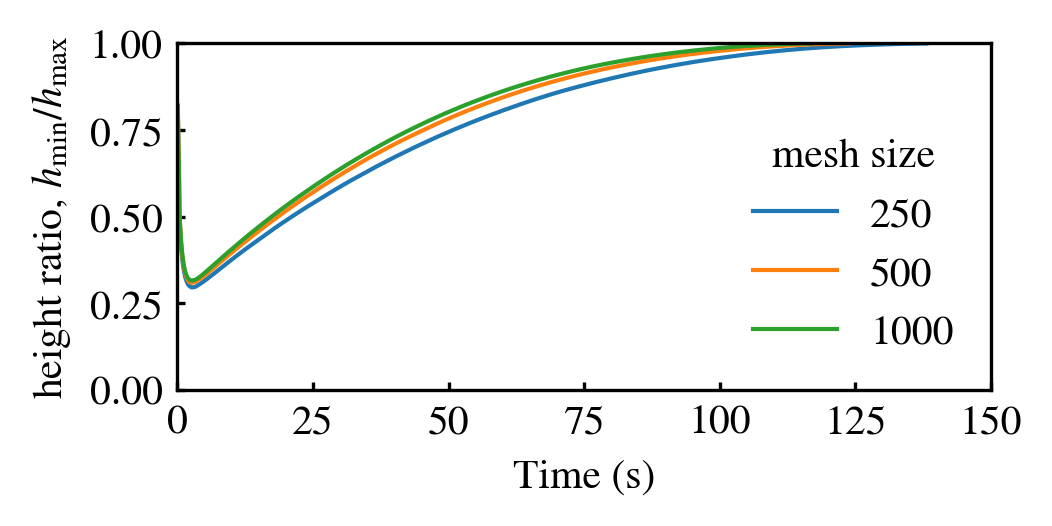

In [ ]:
folder = r"G:\My Drive\Research projects\WPM\Data\Simulation\meshsize\dimple_detection"
sparse = pd.read_csv(os.path.join(folder, "250.csv"))
dense = pd.read_csv(os.path.join(folder, "500.csv"))
denser = pd.read_csv(os.path.join(folder, "1000.csv"))
fig, ax = plt.subplots(ncols=1, figsize=(3.5,1.5), dpi=300, sharex=True, sharey=True, gridspec_kw={"wspace":0.1})
ax.plot(sparse.t, sparse.minima/sparse.maxima, lw=1, label="250")
ax.plot(dense.t, dense.minima/dense.maxima, lw=1, label="500")
ax.plot(denser.t, denser.minima/denser.maxima, lw=1, label="1000")
# ax.plot(sparse.t, sparse.minima, lw=1)
# ax.plot(dense.t, dense.minima, lw=1)
# ax.plot(denser.t, denser.minima, lw=1)
ax.set_ylim([0, 1])
ax.set_xlim([0, 150])
ax.set_xlabel("Time (s)")
ax.set_ylabel("height ratio, $h_\mathrm{min}/h_\mathrm{max}$")
ax.legend(frameon=False, loc="lower right", title="mesh size")
plt.tight_layout()
fig.savefig("meshsize_heightratio.svg")

## 3 Length effect

### 3.1 Examples

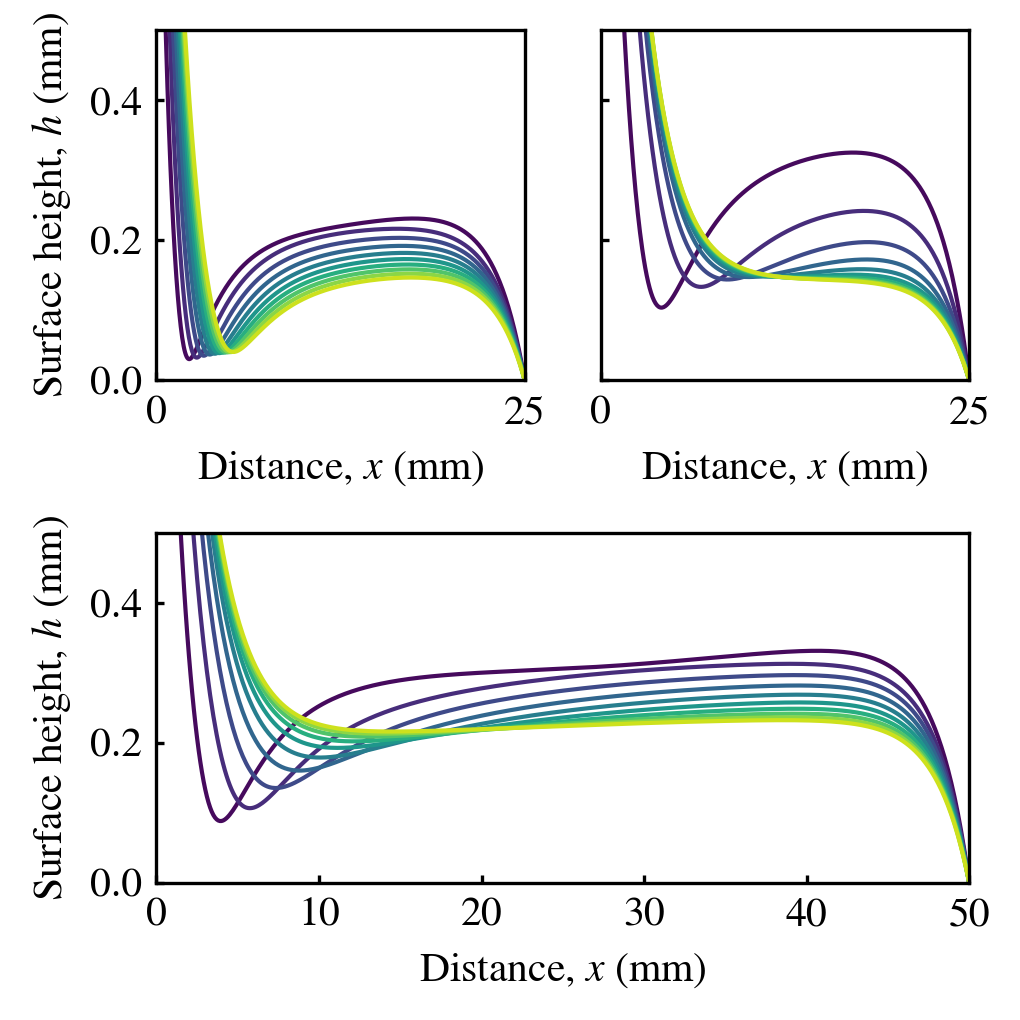

In [96]:
folder = r"C:\Users\zl948\Documents\WPM_simulation\thickness_length"

thin = pd.read_hdf(os.path.join(folder, "mu_1.00e-02_sigma_4.20e-02_h0_2.00e-04_L_2.50e-02.h5"))
thick = pd.read_hdf(os.path.join(folder, "mu_1.00e-02_sigma_4.20e-02_h0_3.00e-04_L_2.50e-02.h5"))
longg = pd.read_hdf(os.path.join(folder, "mu_1.00e-02_sigma_4.20e-02_h0_3.00e-04_L_5.00e-02.h5"))

fig = plt.figure(figsize=(3.5, 3.5), dpi=300)
cmap = plt.get_cmap("viridis")

ax = fig.add_subplot(221)
for kw in thin.columns[50::200]:
    h = thin[kw].values
    x = thin.index.values
    ax.plot(thin.index, thin[kw], color=cmap(float(kw)/tmax), lw=1)
    ax.set_xlim([0, 25])
    ax.set_ylim([0, .5])
    ax.set_xticks([0, 25])
    ax.set_xlabel("Distance, $x$ (mm)")
    ax.set_ylabel("Surface height, $h$ (mm)")
ax = fig.add_subplot(222)
for kw in thin.columns[50::200]:
    h = thick[kw].values
    x = thick.index.values
    ax.plot(thick.index, thick[kw], color=cmap(float(kw)/tmax), lw=1)
    ax.set_xlim([0, 25])
    ax.set_ylim([0, .5])
    ax.set_xticks([0, 25])
    ax.set_yticklabels([])
    ax.set_xlabel("Distance, $x$ (mm)")
    # ax.set_ylabel("Surface height, $h$ (mm)")
ax = fig.add_subplot(212)
for kw in thin.columns[50::200]:
    h = longg[kw].values
    x = longg.index.values
    ax.plot(longg.index, longg[kw], color=cmap(float(kw)/tmax), lw=1)
    ax.set_xlim([0, 50])
    ax.set_ylim([0, .5])
    ax.set_xlabel("Distance, $x$ (mm)")
    ax.set_ylabel("Surface height, $h$ (mm)")
# add a colorbar to the plot
plt.tight_layout()
fig.savefig("thickness_length.svg")

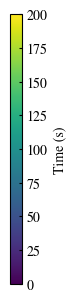

In [102]:
fig, ax = plt.subplots(figsize=(.15, 3.5))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
plt.colorbar(sm, cax=ax, label="Time (s)")
fig.savefig("colorbar.svg")

### 3.2 Dimple time vs. initial thickness

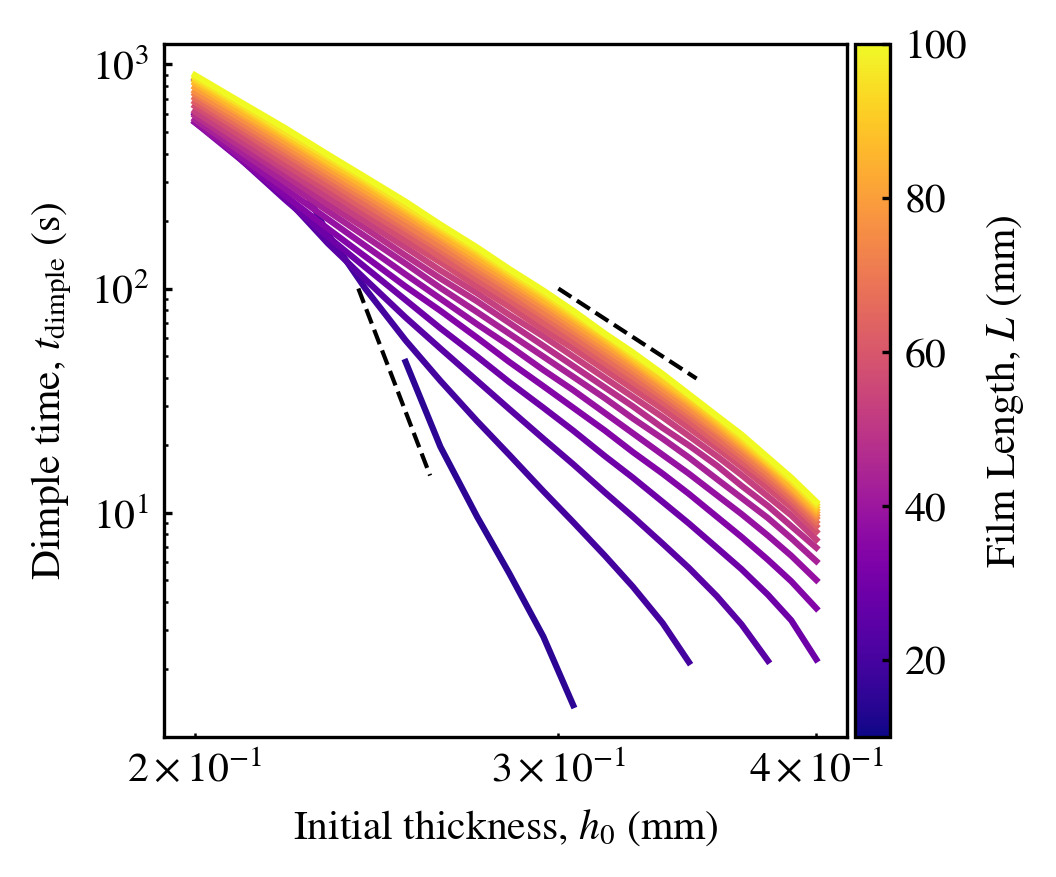

In [23]:
folder = r"C:\Users\zl948\Documents\WPM_simulation\LH_PD"
dimple = pd.read_csv(os.path.join(folder, "dimple_detection", "dimple_time.csv"))
cmap = plt.get_cmap("plasma")
dimple.L *= 1e3
vmin, vmax = dimple.L.min(), dimple.L.max() # get the min and max of L for color mapping
dimple = dimple.loc[dimple.sigma==0.042]
# dimple = dimple.loc[dimple.h0>2.2e-4]
dimple = dimple.loc[dimple.t < 1000]

fig, ax = plt.subplots(figsize=(3.5, 3), dpi=300) # create a figure and axis for the plot
for L, gg in dimple.groupby("L"):
    ax.plot(gg.h0*1e3, gg.t, ls="-",  label=f"$L={L:.1f}$ mm", color=cmap((L-vmin)/(vmax-vmin))) # plot the lines for each L, color mapped by L
# ax.set_xlim([0.23, 0.42])
ax.loglog()
ax.set_xlabel("Initial thickness, $h_0$ (mm)")
ax.set_ylabel("Dimple time, $t_\mathrm{dimple}$ (s)")
norm = plt.Normalize(vmin=vmin, vmax=vmax) # create a normalization for the color mapping
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) # create a ScalarMappable for the color bar
plt.colorbar(sm, ax=ax, label="Film Length, $L$ (mm)", orientation='vertical', pad=0.01) # add the color bar to the plot
x = np.linspace(.24, .26)
y = x**-24
y = y / y[0] * 100
ax.plot(x, y, "--", color="black", lw=1)
x = np.linspace(.3, .35)
y = x**-6
y = y / y[0] * 100
ax.plot(x, y, "--", color="black", lw=1)
fig.savefig("dimple_time.svg") # save the figure

## 4 Dominant force and dimple time approximations

### 4.1 Phase diagram

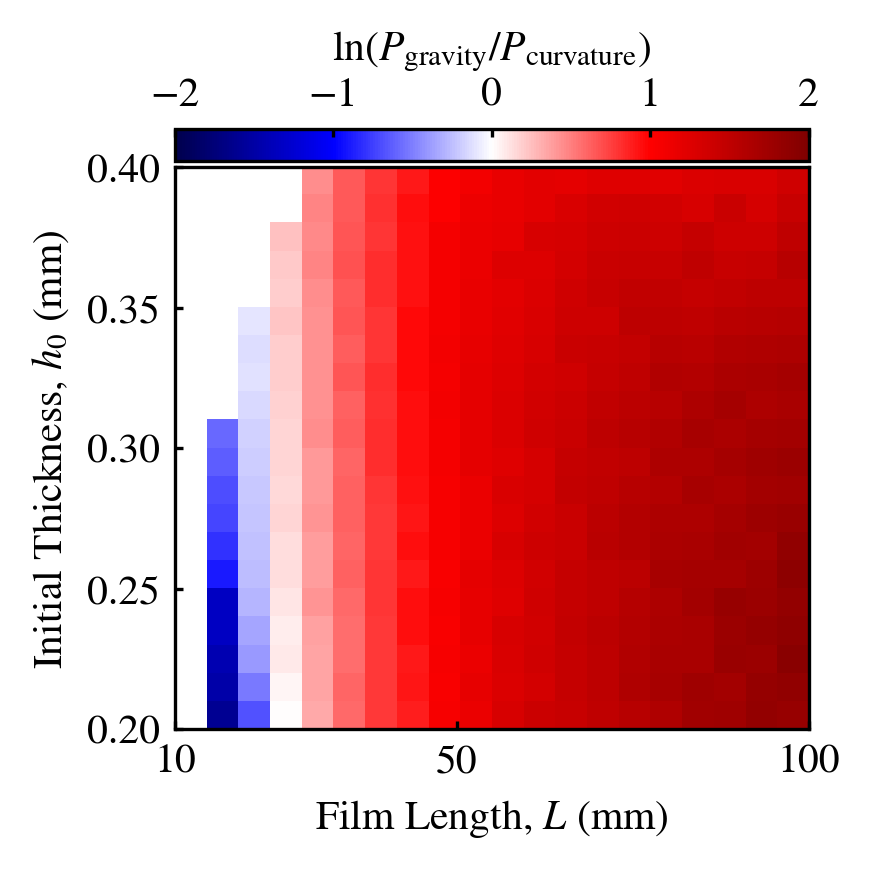

In [61]:
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.L *= 1e3
pressure.h0 *= 1e3
pressure.sort_values(by=["h0", "L"], inplace=True)
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
vmin, vmax = -2, 2
len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
ax.imshow(np.log(pressure.pg / pressure.pc).values.reshape(len_h0, len_L), 
           extent=[pressure.L.min(), pressure.L.max(), pressure.h0.min(), pressure.h0.max()],
           origin='lower', aspect='auto', cmap="seismic", vmin=vmin, vmax=vmax)#, interpolation="bilinear")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="seismic", norm=norm)
plt.colorbar(sm, ax=ax, label='$\ln (P_\mathrm{gravity}/P_\mathrm{curvature})$', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
ax.set_xticks([10, 50, 100])
plt.tight_layout()
fig.savefig("pressure_ratio.svg")

### 4.2 Dimple time approximations

In [ ]:
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.L *= 1e3
pressure.h0 *= 1e3

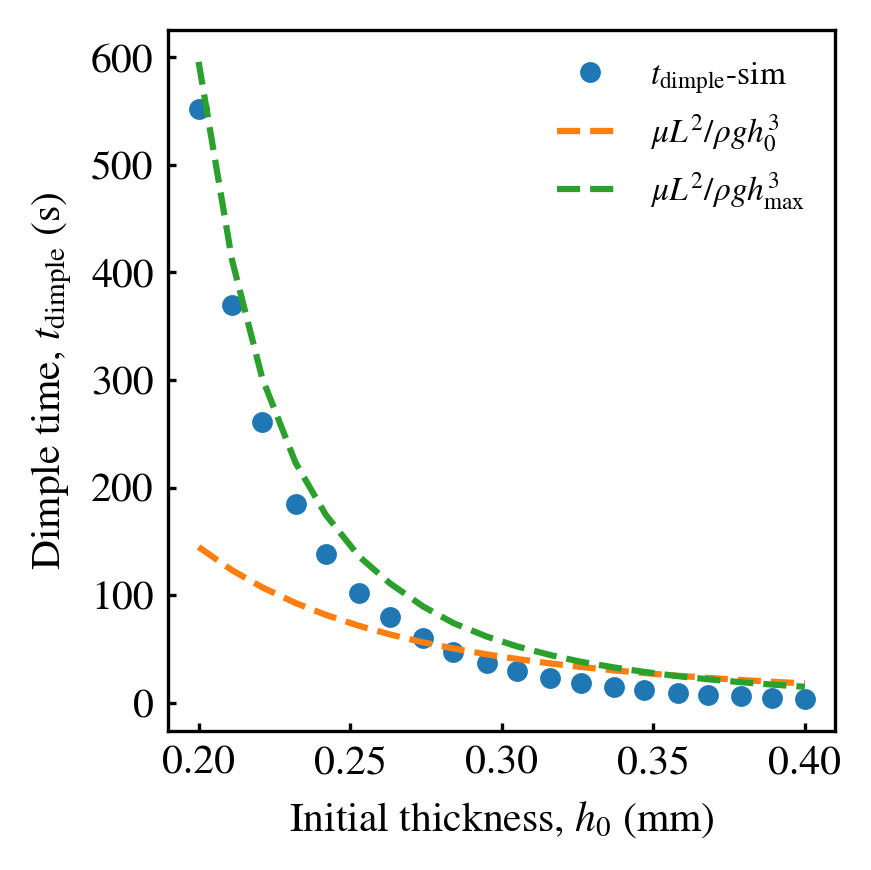

In [62]:
# check approx1 and approx2
g = pressure.loc[pressure.L == 33.7]
approx1 = g["mu"] * g["L"]**2 / g["h0"]**3 / 1e3 / 9.8 * 1e3
approx2 = g["mu"] * g["L"]**2 / g["hmax"]**3 / 1e3 / 9.8 * 1e3 
approx3 = g["mu"] * g["L"]**2 / ((g["hmax"]+g["h0"])/2)**3 / 1e3 / 9.8 * 1e3

fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
ax.plot(g["h0"], g["t"], "o", ls="", label="$t_\mathrm{dimple}$-sim", markersize=4, color=bestcolor(0))
ax.plot(g["h0"], approx1, ls="--", label="$\mu L^2/\\rho g h_0^3$", color=bestcolor(1))
ax.plot(g["h0"], approx2, ls="--", label="$\mu L^2/\\rho g h_\mathrm{max}^3$", color=bestcolor(2))
# ax.plot(g["h0"], approx3, ls="--", label="$\mu L^2/\\rho g h_\mathrm{max}^3$", color=bestcolor(3))
# plt.plot(g["h0"]*1e3, tau2, "o")
ax.legend(fontsize=8, frameon=False, loc="upper right")
ax.set_xlabel("Initial thickness, $h_0$ (mm)")
ax.set_ylabel("Dimple time, $t_\mathrm{dimple}$ (s)")
# ax.set_xlim([0.23, .4])
# ax.set_ylim([0, 200])
# ax.loglog()
plt.tight_layout()
fig.savefig("approximation_check.svg")

## 5 Film thickness approximation

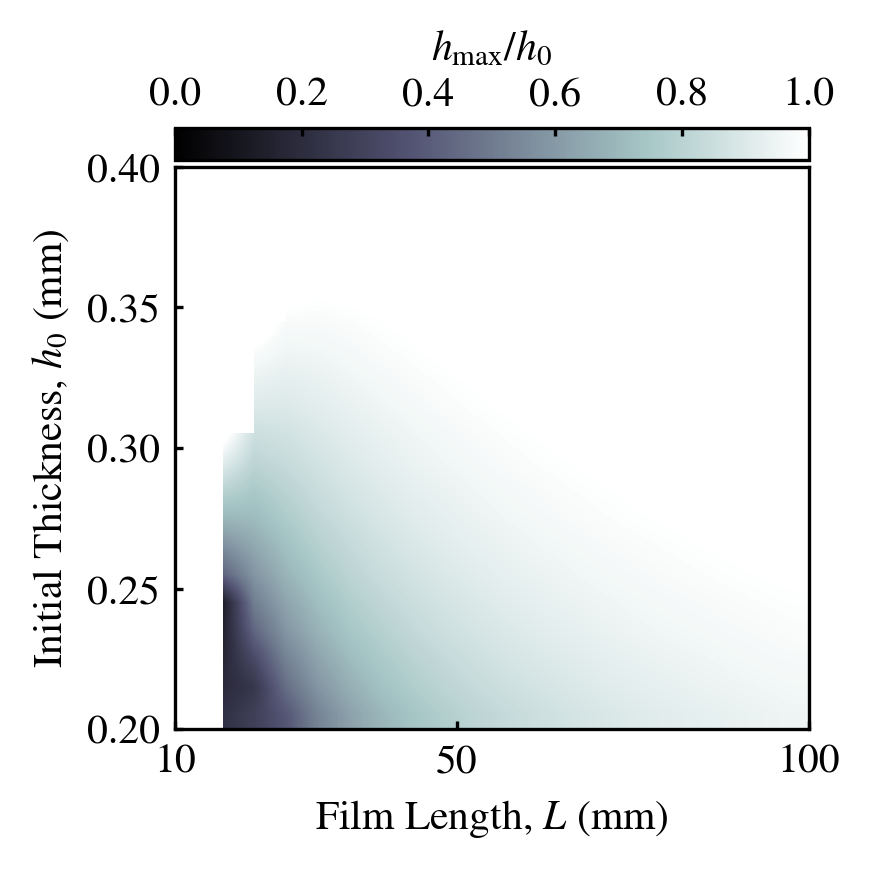

In [71]:
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.L *= 1e3
pressure.h0 *= 1e3
pressure.sort_values(by=["h0", "L"], inplace=True)
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
vmin, vmax = 0, 1
cmap = "bone"
len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
ax.imshow((pressure.hmax / pressure.h0).values.reshape(len_h0, len_L), 
           extent=[pressure.L.min(), pressure.L.max(), pressure.h0.min(), pressure.h0.max()],
           origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, interpolation="bilinear")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, label='$h_\mathrm{max}/h_0$', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
ax.set_xticks([10, 50, 100])
plt.tight_layout()
fig.savefig("hmax_approx.svg")

## 6 Meniscus volume

In [79]:
pressure

,mu,sigma,h0,L,t,pg,pc,ld,hmin,hmax,Vm
1,0.01,0.042,0.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.01,0.042,0.2,14.7,1000.000000,0.334133,1.648456,5332.064128,0.009770,0.043831,2.562081
3,0.01,0.042,0.2,19.5,1000.000000,0.364372,0.722321,6955.911824,0.020291,0.057434,3.173141
4,0.01,0.042,0.2,24.2,847.086827,0.372835,0.367285,8341.482966,0.037735,0.075741,3.523428
5,0.01,0.042,0.2,28.9,599.484250,0.520343,0.373182,8339.879760,0.052423,0.105466,3.527271
...,...,...,...,...,...,...,...,...,...,...,...
396,0.01,0.042,0.4,81.1,10.000000,2.083289,0.611349,7313.627255,0.211577,0.423941,3.166305
397,0.01,0.042,0.4,85.8,10.280447,2.082140,0.586859,7393.587174,0.211405,0.423652,3.187550
398,0.01,0.042,0.4,90.5,10.568760,2.080104,0.576102,7435.871743,0.211302,0.423341,3.208653
399,0.01,0.042,0.4,95.3,10.865158,2.078267,0.576132,7448.296593,0.211181,0.423033,3.230152


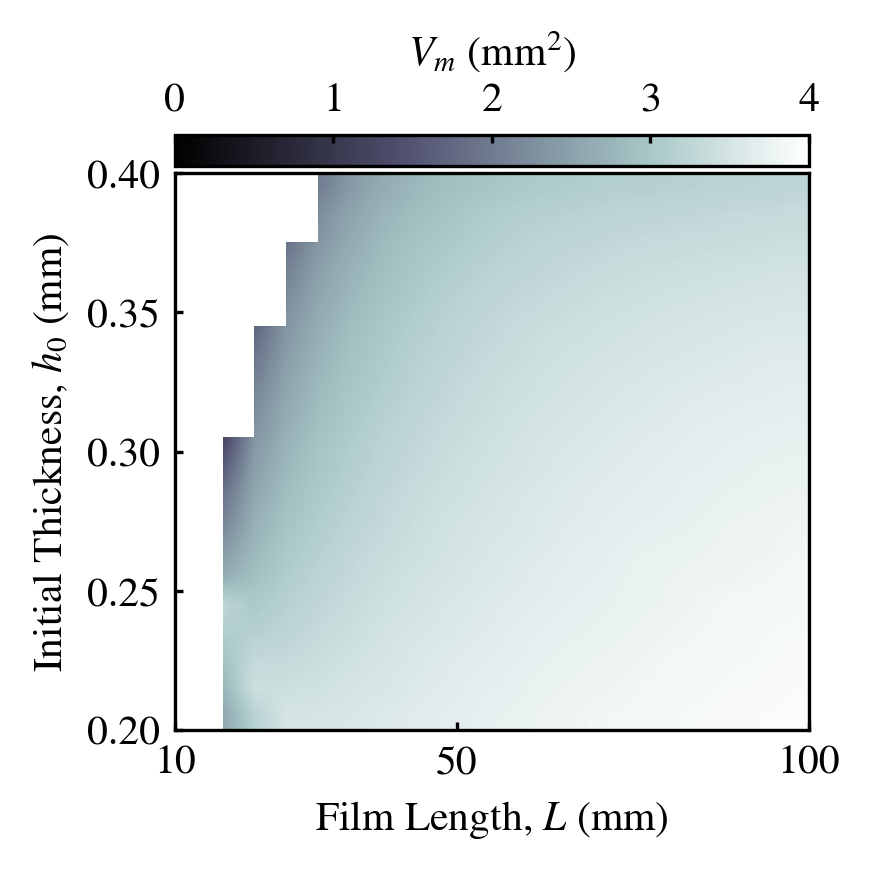

In [93]:
pressure = pd.read_csv(r"C:\Users\zl948\Documents\WPM_simulation\LH_PD\dimple_detection\dimple_time.csv")
pressure.L *= 1e3
pressure.h0 *= 1e3
pressure.sort_values(by=["h0", "L"], inplace=True)
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
vmin, vmax = 0, 4
cmap = "bone"
len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
ax.imshow(pressure.Vm.values.reshape(len_h0, len_L), 
           extent=[pressure.L.min(), pressure.L.max(), pressure.h0.min(), pressure.h0.max()],
           origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, interpolation="bilinear")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, label='$V_m$ (mm$^2$)', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
ax.set_xticks([10, 50, 100])
plt.tight_layout()
fig.savefig("meniscus_volume.svg")

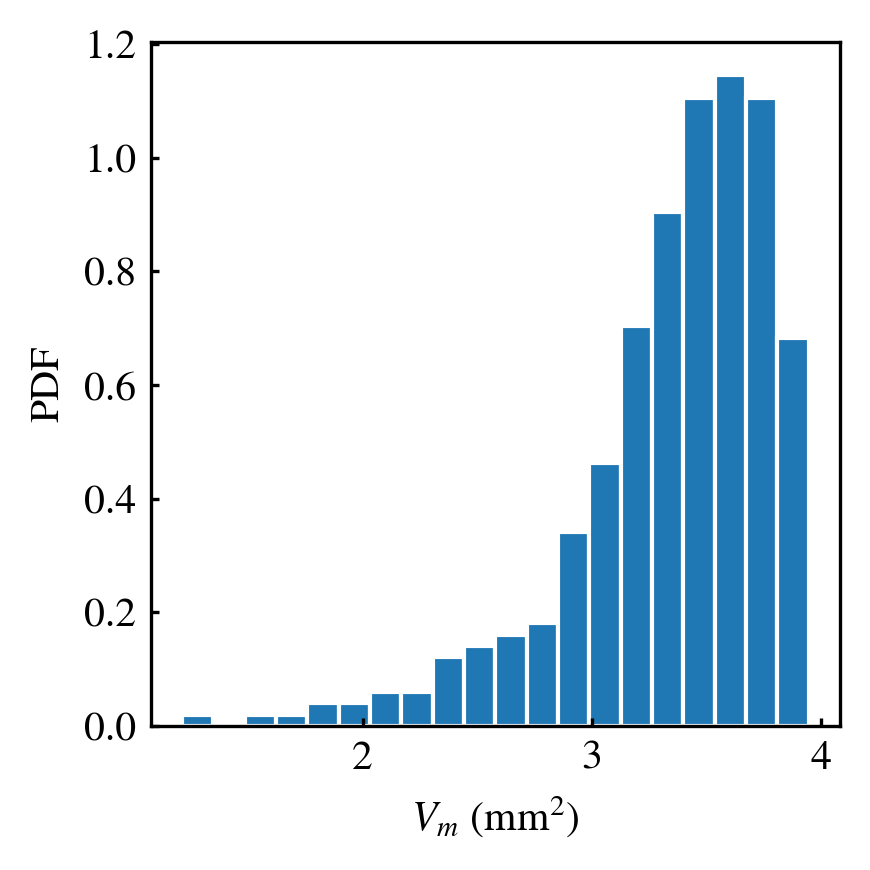

In [92]:
# histogram of Vm
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
ax.hist(pressure.Vm, bins=20, color=bestcolor(0), edgecolor="white", density=True)
ax.set_xlabel("$V_m$ (mm$^2$)")
ax.set_ylabel("PDF")
plt.tight_layout()
fig.savefig("meniscus_volume_pdf.svg")

### 3.1 Gravity vs. surface tension

In [42]:
folder = os.path.join(r"G:\My Drive\Research projects\WPM\Data\Simulation\phase_diagram")

In [43]:
rho = 1e3
g = 9.8

dimple = pd.read_csv(os.path.join(folder, "dimple_detection", "dimple_time.csv"))

Pg = []
Pc = []
hmin_list = []
hmax_list = []
Vm_list = []
for num, i in dimple.iterrows():
    filename = f"mu_{i.mu:.2e}_sigma_{i.sigma:.2e}_h0_{i.h0:.2e}_L_{i.L:.2e}.csv"
    df_dimple = pd.read_csv(os.path.join(folder, "dimple_detection", filename))
    df = pd.read_csv(os.path.join(folder, filename)).set_index("x")
    if np.isnan(i.t):
        pg = np.nan
        pc = np.nan
        hmin = np.nan
        hmax = np.nan
        Vm = np.nan
    else:
        df_dimple = df_dimple.loc[np.argmin(np.abs(df_dimple.t-i.t))]
        pg = rho * g * (df_dimple.maxima-df_dimple.minima) * 1e-3
        pc = i.sigma * df_dimple.curvature_minima * 1e3
        hmin = df_dimple.minima
        hmax = df_dimple.maxima
        h = df.iloc[:int(df_dimple.minima_index), np.argmin(np.abs(df.columns.astype(float)-i.t))]
        Vm = integrate.trapezoid(h-i.h0*1e3, x=h.index)
    Pg.append(pg)
    Pc.append(pc)
    hmin_list.append(hmin)
    hmax_list.append(hmax)
    Vm_list.append(Vm)

In [68]:
dimple["Pg"] = Pg
dimple["Pc"] = Pc
dimple["hmin"] = hmin_list
dimple["hmax"] = hmax_list
dimple["Vm"] = Vm_list

# remove invalid data
invalid_ind = dimple.t==200
dimple.loc[invalid_ind, "t"] = np.nan
dimple.loc[invalid_ind, "Pg"] = np.nan
dimple.loc[invalid_ind, "Pc"] = np.nan

# save the updated dimple data
dimple.to_csv(os.path.join(folder, "dimple_detection", "dimple_time.csv"), index=False)

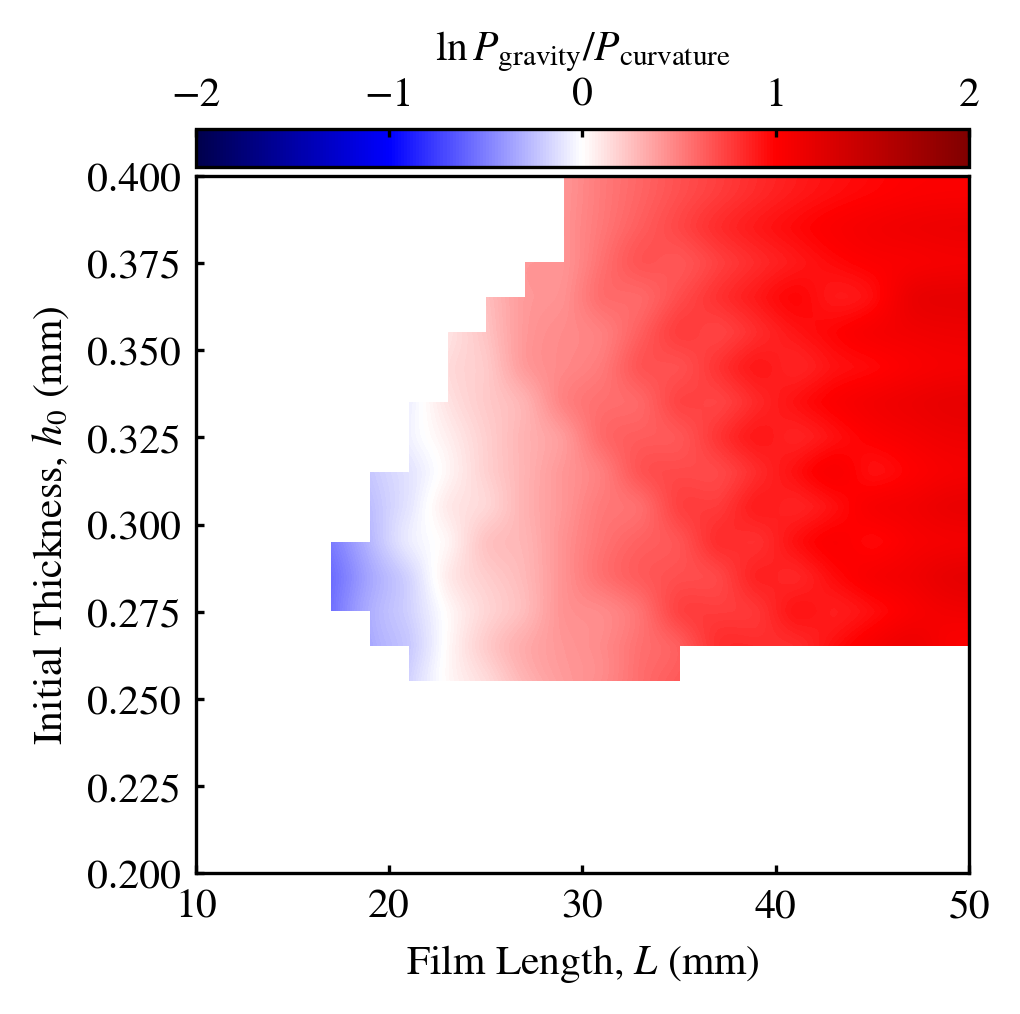

In [71]:
folder = os.path.join(r"G:\My Drive\Research projects\WPM\Data\Simulation\phase_diagram")
pressure = pd.read_csv(os.path.join(folder, "dimple_detection", "dimple_time.csv"))
fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=300)
vmin, vmax = -2, 2
pressure.h0 *= 1e3
pressure.L *= 1e3

len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
ax.imshow(np.log(pressure.Pg / pressure.Pc).values.reshape(len_h0, len_L), 
           extent=[pressure.L.min(), pressure.L.max(), pressure.h0.min(), pressure.h0.max()],
           origin='lower', aspect='auto', cmap="seismic", vmin=vmin, vmax=vmax, interpolation="spline16")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="seismic", norm=norm)
plt.colorbar(sm, ax=ax, label='$\ln P_\mathrm{gravity}/P_\mathrm{curvature}$', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
plt.tight_layout()
fig.savefig("pressure_ratio.svg")

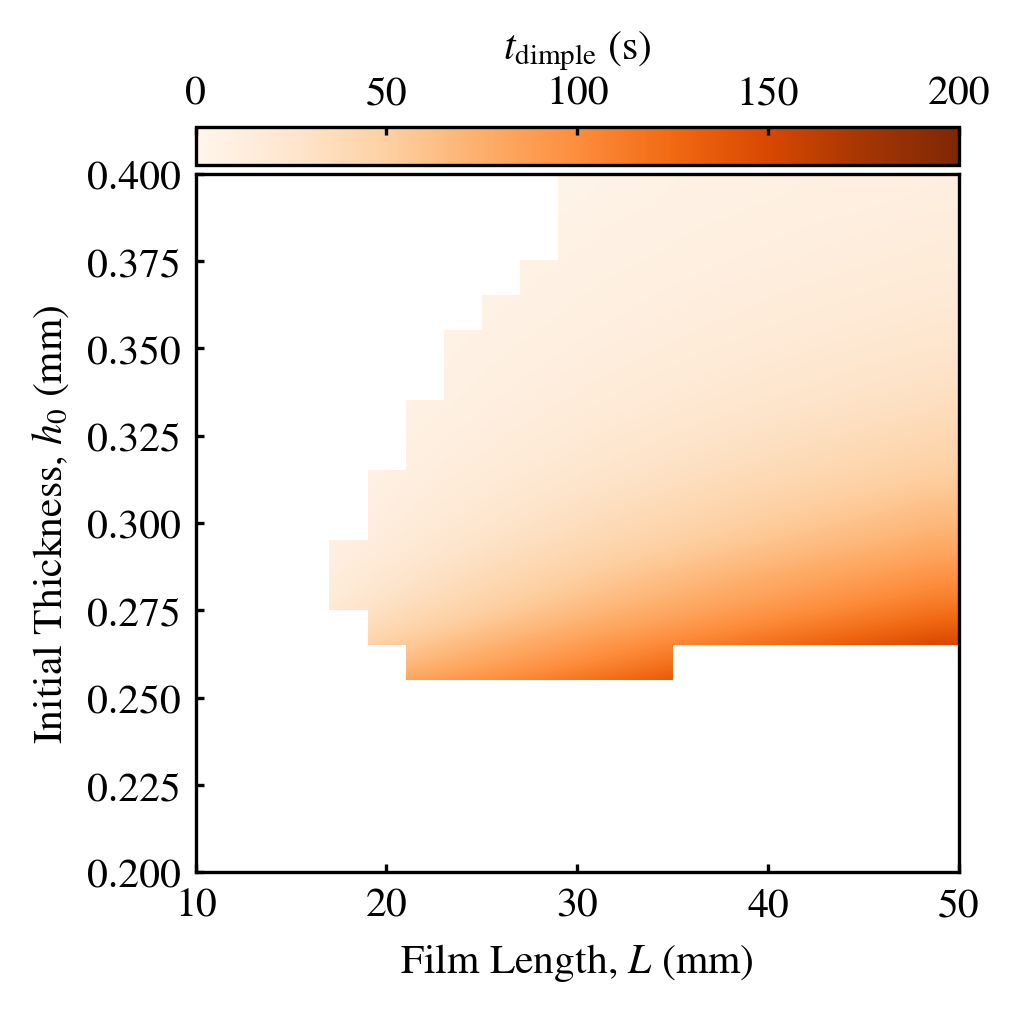

In [72]:
# dimple time
folder = os.path.join(r"G:\My Drive\Research projects\WPM\Data\Simulation\phase_diagram")
vmin, vmax = 0, 200
cmap = plt.get_cmap("Oranges")
###############

pressure = pd.read_csv(os.path.join(folder, "dimple_detection", "dimple_time.csv"))
fig, ax = plt.subplots(figsize=(3.5, 3.5), dpi=300)

pressure.h0 *= 1e3
pressure.L *= 1e3
invalid_ind = pressure.t==200
pressure.loc[invalid_ind, "t"] = np.nan
pressure.loc[invalid_ind, "Pg"] = np.nan
pressure.loc[invalid_ind, "Pc"] = np.nan

len_h0 = len(pressure.h0.unique())
len_L = len(pressure.L.unique())
ax.imshow(pressure.t.values.reshape(len_h0, len_L), 
           extent=[pressure.L.min(), pressure.L.max(), pressure.h0.min(), pressure.h0.max()],
           origin='lower', aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, interpolation="spline16")
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, label='$t_\mathrm{dimple}$ (s)', orientation='horizontal', pad=0.01, location='top')
ax.set_xlabel('Film Length, $L$ (mm)')
ax.set_ylabel('Initial Thickness, $h_0$ (mm)')
plt.tight_layout()

In [73]:
np.log10(10)

1.0

In [77]:
np.logspace(0, np.log10(1000),1000)

array([   1.        ,    1.00693863,    1.01392541,    1.02096066,
          1.02804473,    1.03517796,    1.04236067,    1.04959323,
          1.05687597,    1.06420924,    1.0715934 ,    1.07902879,
          1.08651577,    1.09405471,    1.10164595,    1.10928986,
          1.11698682,    1.12473718,    1.13254132,    1.1403996 ,
          1.14831241,    1.15628013,    1.16430313,    1.1723818 ,
          1.18051653,    1.1887077 ,    1.1969557 ,    1.20526094,
          1.2136238 ,    1.22204469,    1.230524  ,    1.23906216,
          1.24765955,    1.2563166 ,    1.26503372,    1.27381132,
          1.28264983,    1.29154967,    1.30051125,    1.30953502,
          1.3186214 ,    1.32777083,    1.33698374,    1.34626058,
          1.35560179,    1.36500781,    1.37447909,    1.3840161 ,
          1.39361927,    1.40328908,    1.41302599,    1.42283046,
          1.43270295,    1.44264395,    1.45265393,    1.46273336,
          1.47288272,    1.48310251,    1.49339322,    1.50375

In [9]:
folder = r"C:\Users\zl948\Documents\WPM_simulation"
df = pd.read_hdf(os.path.join(folder, "test.h5"), "data")

In [7]:
df = pd.read_csv(os.path.join(folder, "test.csv"))

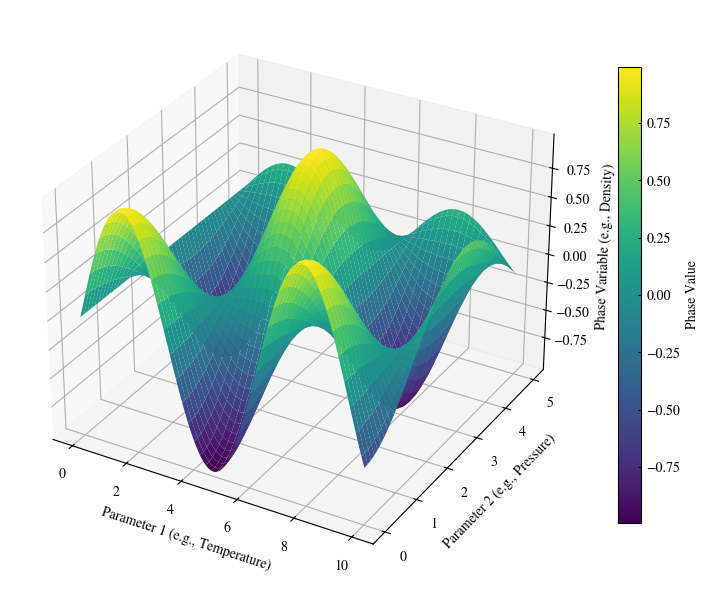

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data for the phase diagram
# Replace this with your actual data
x = np.linspace(0, 10, 100)  # Parameter 1 (e.g., temperature)
y = np.linspace(0, 5, 100)   # Parameter 2 (e.g., pressure)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)    # Example phase variable (e.g., density)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels and color bar
ax.set_xlabel('Parameter 1 (e.g., Temperature)')
ax.set_ylabel('Parameter 2 (e.g., Pressure)')
ax.set_zlabel('Phase Variable (e.g., Density)')
fig.colorbar(surf, ax=ax, label='Phase Value', shrink=0.8)

# Set the view so the vertical axis is vertical
# ax.view_init(elev=45, azim=45)  # Adjust elevation and azimuth angles

# Show the plot
plt.tight_layout()
plt.show()

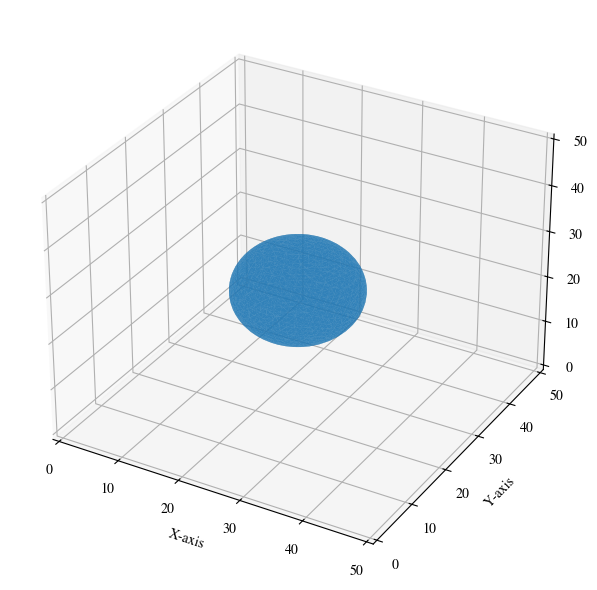

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import marching_cubes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Example 3D matrix (replace this with your actual data)
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
z = np.linspace(-5, 5, 50)
X, Y, Z = np.meshgrid(x, y, z)
values = np.sqrt(X**2 + Y**2 + Z**2)  # Example: distance from origin

# Define the isotherm value (e.g., temperature)
isovalue = 2.0

# Extract the isosurface
verts, faces, normals, values1 = marching_cubes(values, level=isovalue)

# Plot the isosurface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D polygon collection
mesh = Poly3DCollection(verts[faces], alpha=0.7)
# mesh.set_facecolor('cyan')
ax.add_collection3d(mesh)

# Set plot limits
ax.set_xlim(0, values.shape[0])
ax.set_ylim(0, values.shape[1])
ax.set_zlim(0, values.shape[2])

# Add labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.tight_layout()
plt.show()